#### [**Nicolas Cachanosky**](http://www.ncachanosky.com) | Department of Economics | Metropolitan State University of Denver | ncachano@msudenver.edu

# SOLOW MODEL

These notes illustrate how to use code the Solow Model in Python. The purpose of the note is to walk through Python applications, not to offer a detailed discussion of the Solow Model. The note also assumes familiarity with economic concepts and a beginner experience with Python.

For a more complete and detailed discussion of Pythong applications see the material in [Quant Econ](https://quantecon.org/).


## CONTENT
1. The production function
2. Evolution of inputs

## 1. THE PRODUCTION FUNCTION

A neoclassical production function, $f(x_{i})$ where each $x_{i} \geq 0$, satisfies the Inada conditions: 

1. The production function has diminishing marginal returns: $\partial f(x)/\partial x > 0$ and $\partial^2/\partial x^2 <0$
2. If there is no input, there is no production: $f\left(x=0\right)=0$
3. As the value of the input approaches to zero, the first derivative approaches to infinity: $\lim\limits_{x \to 0^+} \partial f(x)/\partial x = +\infty $
4. As the value of the input approaches to infinity, the first derivative approaches to zero: $\lim\limits_{x \to +\infty} \partial f(x)/\partial x = 0^+$

Assume a Cobb-Douglas production function in discrete time $(t)$ with Hicks-neutral techonology $(A)$, and with constant returns to scale where $\alpha \in (0, 1)$ is the output elasticity of capital. 

\begin{equation}
    Y_{t}\left(K_{t}, N_{t}\right) = A_{t} \cdot F\left(K_{t}, N_{t}\right) =  A_{t} \cdot \left(K_{t} ^{\alpha} N_{t}^{1-\alpha}\right)
\end{equation}

The first and second derivatives are:

\begin{equation*}
    \frac{\partial   Y_{t}}{\partial K}   = \alpha \cdot A\left(\frac{N_{t}}{K_{t}}\right)^{1-\alpha} 
  = \alpha \cdot \frac{Y_{t}}{K_{t}} > 0 \; \text{and} \;
    \frac{\partial^2 Y_{t}}{\partial K^2} = -\alpha (1-\alpha) \cdot A\left(\frac{N_{t}}{K_{t}}\right)^{1-\alpha} < 0
    \\
    \frac{\partial   Y_{t}}{\partial N}   = (1-\alpha) \cdot A\left(\frac{K_{t}}{N_{t}}\right)^{\alpha} 
  = (1-\alpha) \cdot \frac{Y_{t}}{N_{t}} > 0 \; \text{and} \;
    \frac{\partial^2 Y_{t}}{\partial N^2} = -\alpha (1-\alpha) \cdot A\left(\frac{K_{t}}{N_{t}}\right)^{1-\alpha} < 0
\end{equation*}

Python can also calculate the derivatives. For this, Python needs two packages, 'numpy' and "sympy'. In addition, the result of the derivatino can be printed in LaTeX format. The example below calculates the first partial derivative of the output function with respect to capital.

In [33]:
"IMPORT PACKAGES"
import numpy as np
from sympy import Symbol
from sympy import latex

"TELL PYTHON TO TREAT VARIABLES AS 'MATH' SYMBOLS"
A, K, N, alpha = Symbol('A'), Symbol('K'), Symbol('N'), Symbol('alpha')  # Treat 'A', 'K', 'N', and 'alpha' as variables
Y = A * (K)**(alpha) * (N)**(1-alpha)                                    # Production function

"CALCULATE THE DERIVATIVE AND PRINT THE RESULT"
Yprime = Y.diff(K)   # Calculate the partial derivative with respect to K
print(Yprime)        # Print dY/dK
latex(Yprime)        # Print dY/dK in LaTeX format

A*K**alpha*N**(-alpha + 1)*alpha/K


'\\frac{A \\alpha}{K} K^{\\alpha} N^{- \\alpha + 1}'

The following code plots the level of output for chnages in $K$. The first part of the code defines the parameter values and builds a user-defined (production) function. The second part of the code builds the graph. To be able to plot, Python needs the 'matplotlib' package.

Remember that Python counts the first element of a vector V with a zero. The first element would be V[0].The code sets the line to be a solid blue line ("b-") with some transparency (alpha = 0.60).

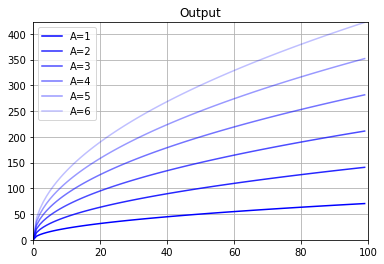

In [74]:
"IMPORT PACKAGES"
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

"DEFINE PARAMETERS AND ARRAYS"
K_size = 100          # Model domain
A = 1                 # Total Factor Productivity
N = K_size/2          # Capital stock
alpha = 0.50          # Output elasticity of capital
K = np.arange(K_size) # Create empty vector of K
Y = np.empty(K_size)  # Create empty vector of Y

Y2 = np.empty(K_size)
Y3 = np.empty(K_size)
Y4 = np.empty(K_size)
Y5 = np.empty(K_size)
Y6 = np.empty(K_size)

def output(K, A):                # User-defined Cobb-Douglas Production Function
    Y = A * (K)**(alpha) * (N)**(1-alpha)    
    return Y

for i in range(0, K_size):  # Calculate output for each value of K in its domain
    TFP   = A
    Y[i]  = output(i, A)  
    Y2[i] = output(i, TFP+1)
    Y3[i] = output(i, TFP+2)
    Y4[i] = output(i, TFP+3)
    Y5[i] = output(i, TFP+4)
    Y6[i] = output(i, TFP+5)
    
Ymax = np.max(Y6)

"PLOT THE PRODUCTION FUNCTION FOR DIFFERENT VALUES OF TECHNOLOGY"
plot_label = '$Y=A \cdot K^{\\alpha}N^{1-\\alpha}$'
v = [0, K_size, 0, Ymax]                                  # Set the range of the horizontal and vertical axes
fig, ax = plt.subplots()
ax.set_title("Output")
ax.grid()
ax.plot(K, Y,  "b-", alpha=1.00, label="A=1")
ax.plot(K, Y2, "b-", alpha=0.85,  label="A=2")
ax.plot(K, Y3, "b-", alpha=0.70, label="A=3")
ax.plot(K, Y4, "b-", alpha=0.55, label="A=4")
ax.plot(K, Y5, "b-", alpha=0.40, label="A=5")
ax.plot(K, Y6, "b-", alpha=0.25, label="A=6")
ax.legend() 
plt.axis(v)
plt.show()


#plt.subplots_adjust(hspace=0)
#ax1 = fig.add_subplot(2, 1, 1) # Output
#ax1.plot(N, Y, "k  ", ls = '-' , label="Output")
#ax1.set(xlabel="Units of Labor (N)", ylabel="Output")
#plt.axvline(x = Nstar, ymin = 0, ymax = 1, ls = ":", color = 'k')
#plt.axhline(y = Ystar, xmin = 0, xmax = 1, ls = ":", color = 'k')
#plt.axis(v)




Since the production function has constant returns to scale, we can express $Y$ in *per* effective unit of labor.

\begin{align}
  y_{t} &= \frac{Y_{t}}{A_{t}N_{t}}                                                                                          \\
  y_{t} &= \frac{A_{t} \cdot \left(K_{t}^{\alpha}N_{t}^{(1-\alpha)} \right)}{A_{t}N_{t}}                                     \\
  y_{t} &= \frac{A_{t}}{A_{t}} \cdot \left(\frac{K_{t}}{N{t}}\right)^{\alpha} \left(\frac{N_{t}}{N_{t}}\right)^{(1-\alpha)}  \\
  y_{t} &= k_{t}^{\alpha}                                                                                                    \\
  y_{t} &=f( k_{t} )                                                                                                         \\
\end{align}

